In [27]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
DATASET = "agnews"
MODEL = "mistral"
OPTIM = "CAPO"

In [60]:
path = f"../results/{DATASET}/{MODEL}/{OPTIM}/*/*/*/step_results_eval.csv"
SEEDS = [42, 43, 44]

In [62]:
df = pd.concat([pd.read_csv(p).assign(seed=seed) for seed, p in zip(SEEDS, glob(path))], axis=0)

In [69]:
df_seeds = []

for seed in SEEDS:
    df_seed = df[df.seed == seed]
    #  sort by test_score
    df_seed = df_seed.sort_values("test_score", ascending=False)
    df_seed = df_seed.groupby("step", as_index=False).mean(
        numeric_only=True
    )  # .first().reset_index()

    df_seeds.append(df_seed)

# avg across seeds
df_avg = pd.concat(df_seeds).groupby("step").mean(numeric_only=True)
df_std = pd.concat(df_seeds).groupby("step").std(numeric_only=True)

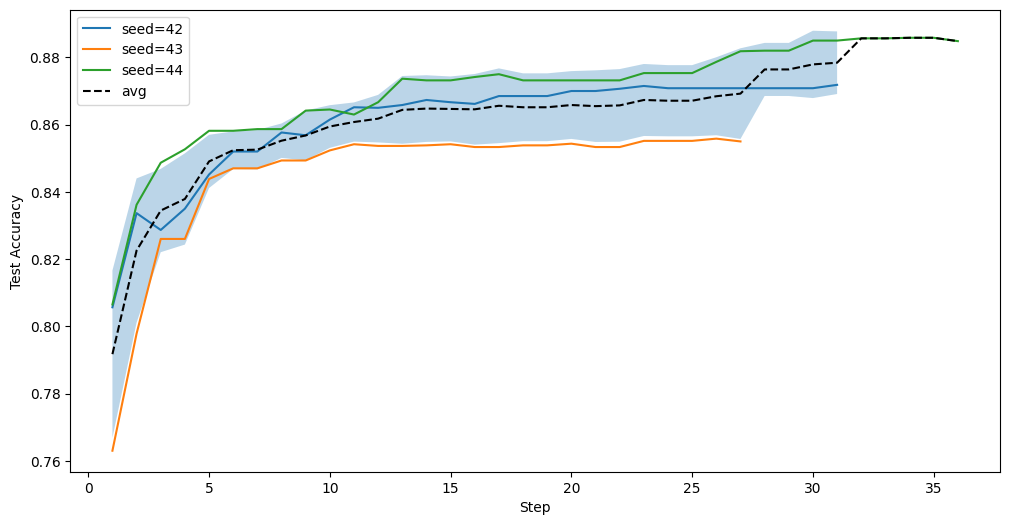

In [70]:
# x = step, y = test_score, color = seed
plt.figure(figsize=(12, 6))
for seed, df_seed in zip(SEEDS, df_seeds):
    plt.plot(df_seed.step, df_seed.test_score, label=f"seed={seed}")
plt.plot(df_avg.index, df_avg.test_score, label="avg", color="black", linestyle="--")
# lover bound
plt.fill_between(
    df_avg.index,
    df_avg.test_score - df_std.test_score,
    df_avg.test_score + df_std.test_score,
    alpha=0.3,
)

plt.legend()
plt.xlabel("Step")
plt.ylabel("Test Accuracy")

plt.show();